In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_full = pd.read_csv('curiophysion_clothiness_full_1.csv')
df_full['scenario'] = 'clothiness'
df_short = pd.read_csv('curiophysion_clothiness_short_1.csv')
df_short['scenario'] = 'clothiness'
df_full.shape

(4837, 95)

In [3]:
def readData (df, filename, tag):
    temp = pd.read_csv(filename)
    temp['scenario'] = tag
    return pd.concat([df,temp], join='inner')

In [4]:
df_full = readData(df_full, 'curiophysion_collision_full_1.csv', 'collision')
df_full = readData(df_full, 'curiophysion_containment_full_1.csv', 'containment')
df_full = readData(df_full, 'curiophysion_dominoes_full_1.csv', 'dominoes')
df_full = readData(df_full, 'curiophysion_drop_full_1.csv', 'drop')
df_full = readData(df_full, 'curiophysion_linking_full_1.csv', 'linking')
df_full = readData(df_full, 'curiophysion_rollingsliding_full_1.csv', 'rollingsliding')
df_full = readData(df_full, 'curiophysion_towers_fullVid_production_3.csv', 'towers')
df_full.columns

Index(['Unnamed: 0', '_id', 'rt', 'stimulus', 'response', 'trial_type',
       'trial_index', 'time_elapsed', 'internal_node_id', 'type',
       'iterationName', 'vid_length_condition',
       'response_allowed_while_playing', 'condition', 'prompt', 'choices',
       'scale_endpoints', 'stim_ID', 'stim_url', 'map_url', 'hdf5_path',
       'hdf5_url', 'stim_set', 'target_hit_zone_label', 'trialNum', 'overlay',
       'overlay_time', 'blink_time', 'stop', 'width', 'height',
       'post_trial_gap', 'button_html', 'autoplay', 'controls', 'start',
       'rate', 'trial_ends_after_video', 'trial_duration', 'margin_vertical',
       'margin_horizontal', 'response_ends_trial', 'flashed', 'gameID',
       'prolificID', 'studyID', 'sessionID', 'stims_not_preloaded', 'workerId',
       'hitID', 'aID', 'eventType', 'responses', 'question_order',
       'comprehension_check_failed', 'randomize_question_order', 'questions',
       'preamble', 'button_label', 'bounciness', 'color', 'distractors',
  

In [5]:
df_short = readData(df_short, 'curiophysion_collision_short_1.csv', 'collision')
df_short = readData(df_short, 'curiophysion_containment_short_1.csv', 'containment')
df_short = readData(df_short, 'curiophysion_dominoes_short_1.csv', 'dominoes')
df_short = readData(df_short, 'curiophysion_drop_short_1.csv', 'drop')
df_short = readData(df_short, 'curiophysion_linking_short_1.csv', 'linking')
df_short = readData(df_short, 'curiophysion_rollingsliding_short_1.csv', 'rollingsliding')
df_short = readData(df_short, 'curiophysion_towers_shortVid_production_3.csv', 'towers')
df_full.columns

Index(['Unnamed: 0', '_id', 'rt', 'stimulus', 'response', 'trial_type',
       'trial_index', 'time_elapsed', 'internal_node_id', 'type',
       'iterationName', 'vid_length_condition',
       'response_allowed_while_playing', 'condition', 'prompt', 'choices',
       'scale_endpoints', 'stim_ID', 'stim_url', 'map_url', 'hdf5_path',
       'hdf5_url', 'stim_set', 'target_hit_zone_label', 'trialNum', 'overlay',
       'overlay_time', 'blink_time', 'stop', 'width', 'height',
       'post_trial_gap', 'button_html', 'autoplay', 'controls', 'start',
       'rate', 'trial_ends_after_video', 'trial_duration', 'margin_vertical',
       'margin_horizontal', 'response_ends_trial', 'flashed', 'gameID',
       'prolificID', 'studyID', 'sessionID', 'stims_not_preloaded', 'workerId',
       'hitID', 'aID', 'eventType', 'responses', 'question_order',
       'comprehension_check_failed', 'randomize_question_order', 'questions',
       'preamble', 'button_label', 'bounciness', 'color', 'distractors',
  

In [6]:
temp = df_full[df_full['trial_type'] == 'video-overlay-button-response']
temp = temp[temp['response'] != 'Next']
temp = temp[['response','target_hit_zone_label', 'rt', 'stimulus_name']]
temp.head()

,response,target_hit_zone_label,rt,stimulus_name
3,4,True,13839.2,test17_0004
4,3,True,13011.8,test18_0016
5,4,False,15522.5,test19_0012
6,4,True,8486.8,test14_0016
7,4,False,8932.2,test16_0019


In [7]:
df_full_1 = df_full[df_full['trial_type'] == 'video-overlay-button-response']
df_full_1 = df_full_1[df_full_1['response'] != 'Next']
df_full_1 = df_full_1[['stim_ID','response', 'target_hit_zone_label', 'rt', 'scenario']]
df_full_1['response'] = df_full_1['response'].astype(str).astype(int)

df_short_1 = df_short[df_short['trial_type'] == 'video-overlay-button-response']
df_short_1 = df_short_1[df_short_1['response'] != 'Next']
df_short_1 = df_short_1[['stim_ID','response', 'target_hit_zone_label', 'rt', 'scenario']]
df_short_1['response'] = df_short_1['response'].astype(str).astype(int)

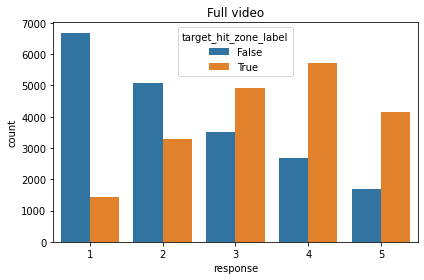

In [8]:
ax = sns.countplot(data=df_full_1, x='response', hue='target_hit_zone_label')
ax.set_title('Full video')
plt.tight_layout()
plt.show()

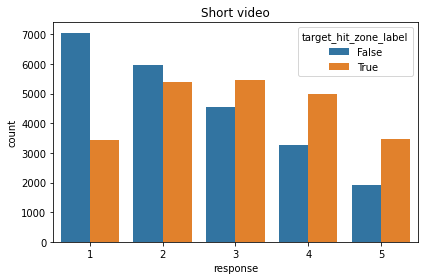

In [9]:
ax = sns.countplot(data=df_short_1, x='response', hue='target_hit_zone_label')
ax.set_title('Short video')
plt.tight_layout()
plt.show()

In [10]:
#df_full_2 = df_full_1.groupby(['stim_ID', 'target_hit_zone_label', 'scenario'])['response'].mean()
df_full_2 = df_full_1.groupby(['stim_ID', 'target_hit_zone_label', 'scenario'], as_index=False).agg({'response':['sum','mean','std', 'count']})
df_full_2.columns = ['stim_ID', 'target_hit_zone_label', 'scenario', 'response_sum', 'response_mean', 'response_sd', 'count']
df_full_2 = df_full_2.reset_index()
df_full_2.head()

,index,stim_ID,target_hit_zone_label,scenario,response_sum,response_mean,response_sd,count
0,0,pilot-containment-bowl_0001_img,False,containment,84,3.500000,1.063219,24
1,1,pilot-containment-bowl_0002_img,True,containment,67,2.791667,1.382473,24
2,2,pilot-containment-bowl_0003_img,True,containment,98,3.769231,1.069867,26
3,3,pilot-containment-bowl_0005_img,False,containment,30,1.250000,0.607919,24
4,4,pilot-containment-bowl_0007_img,False,containment,60,2.500000,0.884652,24


In [11]:
#df_short_2 = df_short_1.groupby(['stim_ID', 'target_hit_zone_label', 'scenario'])['response','rt'].mean()
df_short_2 = df_short_1.groupby(['stim_ID', 'target_hit_zone_label', 'scenario'], as_index=False).agg({'response':['sum','mean','std', 'count']})
df_short_2.columns = ['stim_ID', 'target_hit_zone_label', 'scenario', 'response_sum', 'response_mean', 'response_sd', 'count']
df_short_2 = df_short_2.reset_index()
df_short_2.head()

,index,stim_ID,target_hit_zone_label,scenario,response_sum,response_mean,response_sd,count
0,0,pilot-containment-bowl_0001_img,False,containment,116,3.62500,1.157026,32
1,1,pilot-containment-bowl_0002_img,True,containment,81,2.53125,0.841825,32
2,2,pilot-containment-bowl_0003_img,True,containment,125,3.90625,1.253624,32
3,3,pilot-containment-bowl_0005_img,False,containment,56,1.75000,1.107161,32
4,4,pilot-containment-bowl_0007_img,False,containment,62,1.93750,0.913607,32


In [12]:
sorted_df_full = df_full_2.sort_values(by=['stim_ID'], ascending=True)
sorted_df_short = df_short_2.sort_values(by=['stim_ID'], ascending=True)

In [13]:
comb_df = sorted_df_full.copy()
comb_df['response_mean_short'] = sorted_df_short['response_mean']
comb_df['response_sd_short'] = sorted_df_short['response_sd']
comb_df['count_short'] = sorted_df_short['count']
#comb_df['rt_short'] = sorted_df_short['rt']
comb_df=comb_df.rename(columns = {'response_mean':'response_mean_full', 'reponse_sd':'responnse_sd_full', 'count': 'count_full'})
comb_df.head()

,index,stim_ID,target_hit_zone_label,scenario,response_sum,response_mean_full,response_sd,count_full,response_mean_short,response_sd_short,count_short
0,0,pilot-containment-bowl_0001_img,False,containment,84,3.500000,1.063219,24,3.62500,1.157026,32
1,1,pilot-containment-bowl_0002_img,True,containment,67,2.791667,1.382473,24,2.53125,0.841825,32
2,2,pilot-containment-bowl_0003_img,True,containment,98,3.769231,1.069867,26,3.90625,1.253624,32
3,3,pilot-containment-bowl_0005_img,False,containment,30,1.250000,0.607919,24,1.75000,1.107161,32
4,4,pilot-containment-bowl_0007_img,False,containment,60,2.500000,0.884652,24,1.93750,0.913607,32


<AxesSubplot:xlabel='response_mean_full', ylabel='response_mean_short'>

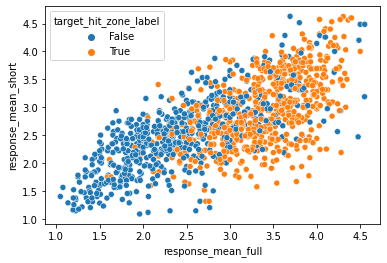

In [14]:
sns.scatterplot(data=comb_df, x="response_mean_full", y="response_mean_short", hue='target_hit_zone_label')

### By scenario

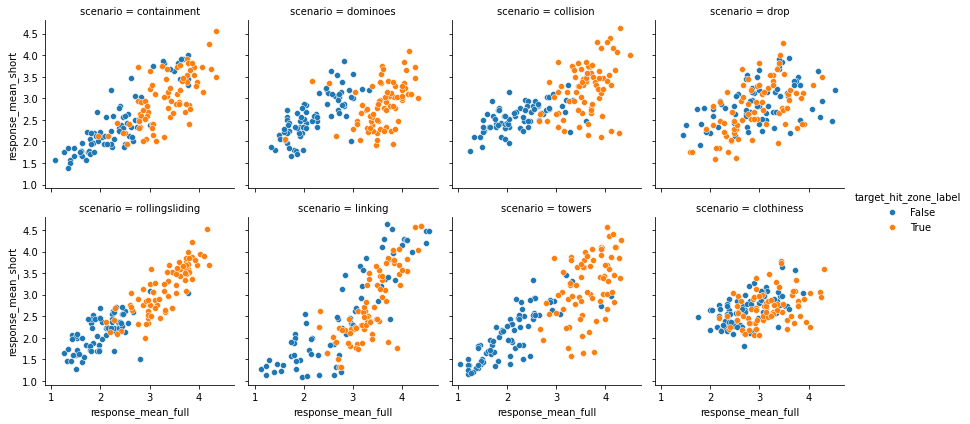

In [15]:
g = sns.FacetGrid(comb_df, col="scenario",  hue="target_hit_zone_label", col_wrap=4)
g.map(sns.scatterplot, "response_mean_full", "response_mean_short")
g.add_legend()
# Look into seaborn FacetGrid -> variable single/covariation

In [16]:
#Barplot with erro bars
df_full_3 = df_full_1.groupby(['scenario'], as_index=False).agg({'response':['mean','std', 'count']})
df_full_3.columns = ['scenario', 'response_mean', 'response_sd', 'count']
df_full_3 = df_full_3.reset_index()
df_short_3 = df_short_1.groupby(['scenario'], as_index=False).agg({'response':['mean','std', 'count']})
df_short_3.columns = ['scenario', 'response_mean', 'response_sd', 'count']
df_short_3 = df_short_3.reset_index()
sorted_df_full = df_full_3.sort_values(by=['scenario'], ascending=True)
sorted_df_short = df_short_3.sort_values(by=['scenario'], ascending=True)
comb_df_1 = sorted_df_full.copy()
comb_df_1['response_mean_short'] = sorted_df_short['response_mean']
comb_df_1['response_sd_short'] = sorted_df_short['response_sd']
comb_df_1['count_short'] = sorted_df_short['count']
comb_df_1=comb_df_1.rename(columns = {'response_mean':'response_mean_full', 'response_sd':'response_sd_full', 'count':'count_full'})
comb_df_1.head()

,index,scenario,response_mean_full,response_sd_full,count_full,response_mean_short,response_sd_short,count_short
0,0,clothiness,2.963855,1.301666,3901,2.671717,1.250544,4950
1,1,collision,2.910851,1.365495,4700,2.907292,1.308900,4800
2,2,containment,2.805714,1.312110,3675,2.686042,1.288857,4800
3,3,dominoes,2.865731,1.381315,4275,2.721667,1.228283,4800
4,4,drop,2.938385,1.343632,4025,2.819167,1.326555,4800


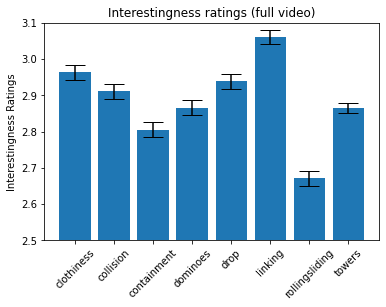

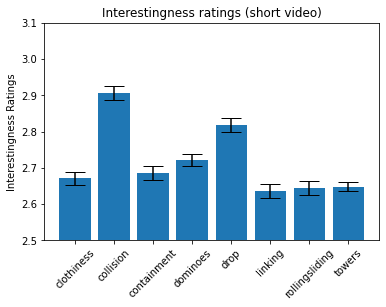

In [28]:
# order by descending order
# x-axis
fig, ax = plt.subplots()
plt.ylim([2.5,3.1])
ax.bar(comb_df_1['scenario'], comb_df_1['response_mean_full'], yerr=comb_df_1['response_sd_full']/np.sqrt(comb_df_1['count_full']), capsize=10)
ax.set_ylabel('Interestingness Ratings')
ax.set_xticks(comb_df_1['scenario'])
ax.set_xticklabels(comb_df_1['scenario'], rotation=45)
ax.set_title('Interestingness ratings (full video)')
plt.show()
fig, ax = plt.subplots()
plt.ylim([2.5,3.1])
ax.bar(comb_df_1['scenario'], comb_df_1['response_mean_short'], yerr=comb_df_1['response_sd_short']/np.sqrt(comb_df_1['count_short']), capsize=10)
# yerr -> sig/sqrt(n)
ax.set_ylabel('Interestingness Ratings')
ax.set_xticks(comb_df_1['scenario'])
ax.set_xticklabels(comb_df_1['scenario'], rotation=45)
ax.set_title('Interestingness ratings (short video)')
plt.show()

In [18]:
# confidence interval based on scenario
comb_df_1['ci_low_full'] = comb_df_1['response_mean_full'] - comb_df_1['response_sd_full'] * 1.96/np.sqrt(comb_df_1['count_full'])
comb_df_1['ci_high_full'] = comb_df_1['response_mean_full'] + comb_df_1['response_sd_full'] * 1.96/np.sqrt(comb_df_1['count_full'])

comb_df_1['ci_low_short'] = comb_df_1['response_mean_short'] - comb_df_1['response_sd_short'] * 1.96/np.sqrt(comb_df_1['count_short'])
comb_df_1['ci_high_short'] = comb_df_1['response_mean_short'] + comb_df_1['response_sd_short'] * 1.96/np.sqrt(comb_df_1['count_short'])
comb_df_1

,index,scenario,response_mean_full,response_sd_full,count_full,response_mean_short,response_sd_short,count_short,ci_low_full,ci_high_full,ci_low_short,ci_high_short
0,0,clothiness,2.963855,1.301666,3901,2.671717,1.250544,4950,2.923008,3.004703,2.636879,2.706555
1,1,collision,2.910851,1.365495,4700,2.907292,1.308900,4800,2.871812,2.949890,2.870263,2.944321
2,2,containment,2.805714,1.312110,3675,2.686042,1.288857,4800,2.763292,2.848137,2.649580,2.722504
3,3,dominoes,2.865731,1.381315,4275,2.721667,1.228283,4800,2.824323,2.907139,2.686918,2.756415
4,4,drop,2.938385,1.343632,4025,2.819167,1.326555,4800,2.896875,2.979895,2.781638,2.856695
5,5,linking,3.062054,1.302047,4625,2.636260,1.326166,5251,3.024529,3.099580,2.600390,2.672130
6,6,rollingsliding,2.671667,1.339156,4200,2.644583,1.338022,4800,2.631166,2.712167,2.606730,2.682436
7,7,towers,2.864781,1.402134,9725,2.648267,1.376084,11250,2.836914,2.892649,2.622838,2.673695


In [19]:
# barplot -> confidence interval, 
from scipy.stats import ttest_ind

print(ttest_ind(comb_df['response_full'], comb_df['response_short']))
#ttest_ind(comb_df['response'], comb_df['response_short'], equal_var=False)
print(ttest_ind(comb_df[comb_df['target_hit_zone_label'] == True]['response_full'], comb_df[comb_df['target_hit_zone_label'] == False]['response_full']))
print(ttest_ind(comb_df[comb_df['target_hit_zone_label'] == True]['response_short'], comb_df[comb_df['target_hit_zone_label'] == False]['response_short']))

KeyError: 'response_full'

### With prediction accuracy

In [22]:
df_acc = pd.read_csv('./csv/humans/human_accuracy-clothiness_pilot-production_2_testing.csv')
df_acc = pd.concat([df_acc, pd.read_csv('./csv/humans/human_accuracy-collision_pilot-production_2_testing.csv')])
df_acc = pd.concat([df_acc, pd.read_csv('./csv/humans/human_accuracy-containment_pilot-production_2_testing.csv')])
df_acc = pd.concat([df_acc, pd.read_csv('./csv/humans/human_accuracy-dominoes_pilot-production_1_testing.csv')])
df_acc = pd.concat([df_acc, pd.read_csv('./csv/humans/human_accuracy-drop_pilot-production_2_testing.csv')])
df_acc = pd.concat([df_acc, pd.read_csv('./csv/humans/human_accuracy-linking_pilot-production_2_testing.csv')])
df_acc = pd.concat([df_acc, pd.read_csv('./csv/humans/human_accuracy-rollingsliding_pilot-production_2_testing.csv')])
df_acc = pd.concat([df_acc, pd.read_csv('./csv/humans/human_accuracy-towers_pilot-production_2_testing.csv')])

sorted_df_acc = df_acc.sort_values(by=['stim_ID'], ascending=True)
sorted_df_acc.head()

,stim_ID,correct,c
0,pilot-containment-bowl_0001_img,0.524752,101
1,pilot-containment-bowl_0002_img,0.950495,101
2,pilot-containment-bowl_0003_img,0.940594,101
3,pilot-containment-bowl_0005_img,0.950495,101
4,pilot-containment-bowl_0007_img,0.752475,101


In [23]:
comb_df_2 = comb_df.merge(sorted_df_acc, how='left', on='stim_ID')
comb_df_2.head()

,index,stim_ID,target_hit_zone_label,scenario,response_sum,response_mean_full,response_sd,count_full,response_mean_short,response_sd_short,count_short,correct,c
0,0,pilot-containment-bowl_0001_img,False,containment,84,3.500000,1.063219,24,3.62500,1.157026,32,0.524752,101
1,1,pilot-containment-bowl_0002_img,True,containment,67,2.791667,1.382473,24,2.53125,0.841825,32,0.950495,101
2,2,pilot-containment-bowl_0003_img,True,containment,98,3.769231,1.069867,26,3.90625,1.253624,32,0.940594,101
3,3,pilot-containment-bowl_0005_img,False,containment,30,1.250000,0.607919,24,1.75000,1.107161,32,0.950495,101
4,4,pilot-containment-bowl_0007_img,False,containment,60,2.500000,0.884652,24,1.93750,0.913607,32,0.752475,101


Correlation Coefficient (hit tartget zone_short): -0.22172600364323247
Correlation Coefficient (hit tartget zone_full): -0.15035338584230598
Correlation Coefficient (miss tartget zone_short): -0.41805455792886304
Correlation Coefficient (miss tartget zone_full): -0.46368436671881685


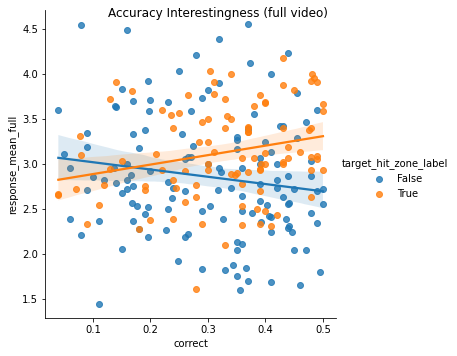

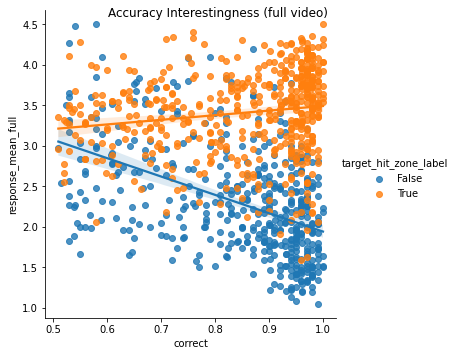

In [38]:
temp = comb_df_2.copy()
temp = temp[temp['correct'] <= 0.5]
hhh = temp[temp['target_hit_zone_label'] == False]
sns.lmplot(x='correct', y='response_mean_full', hue='target_hit_zone_label', data=temp).fig.suptitle('Accuracy Interestingness (full video)')
print("Correlation Coefficient (hit tartget zone_short):",hhh['correct'].corr(hhh['response_mean_short']))
print("Correlation Coefficient (hit tartget zone_full):",hhh['correct'].corr(hhh['response_mean_full']))
temp = comb_df_2.copy()
temp = temp[temp['correct'] > 0.5]
hhh = temp[temp['target_hit_zone_label'] == False]
sns.lmplot(x='correct', y='response_mean_full', hue='target_hit_zone_label', data=temp).fig.suptitle('Accuracy Interestingness (full video)')
print("Correlation Coefficient (miss tartget zone_short):",hhh['correct'].corr(hhh['response_mean_short']))
print("Correlation Coefficient (miss tartget zone_full):",hhh['correct'].corr(hhh['response_mean_full']))

Correlation Coefficient (hit tartget zone): 0.2526798047819034
Correlation Coefficient (miss tartget zone): -0.47445683430608737
Correlation Coefficient (global): -0.09186135468226779


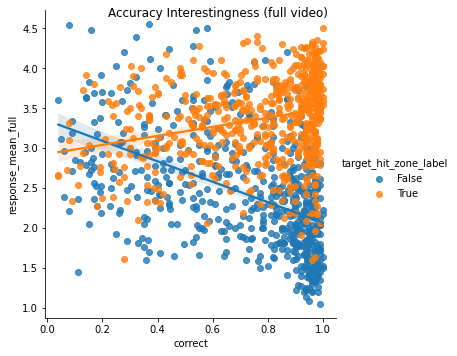

In [30]:
# best fit line
sns.lmplot(x='correct', y='response_mean_full', hue='target_hit_zone_label', data=comb_df_2).fig.suptitle('Accuracy Interestingness (full video)')
hhh = comb_df_2[comb_df_2['target_hit_zone_label'] == True]
hhh = comb_df_2[comb_df_2['target_hit_zone_label'] == True]
print("Correlation Coefficient (hit tartget zone):",hhh['correct'].corr(hhh['response_mean_full']))
hhh = comb_df_2[comb_df_2['target_hit_zone_label'] == False]
print("Correlation Coefficient (miss tartget zone):",hhh['correct'].corr(hhh['response_mean_full']))
print("Correlation Coefficient (global):",comb_df_2['correct'].corr(comb_df_2['response_mean_full']))
# expectation violation -> top left, predict something would happen and it does not -> global trend
# thinking something is going to happen -> more interesting -> preference towards suprise and thinking something is going to happen (successful trials)

Correlation Coefficient (hit tartget zone): 0.4682009193916814
Correlation Coefficient (miss tartget zone): -0.5156585495251913
Correlation Coefficient (global): -0.022257197350991693


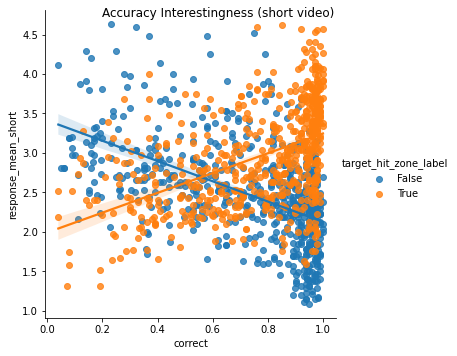

In [31]:
# best fit line
sns.lmplot(x='correct', y='response_mean_short', hue='target_hit_zone_label', data=comb_df_2).fig.suptitle('Accuracy Interestingness (short video)')
hhh = comb_df_2[comb_df_2['target_hit_zone_label'] == True]
print("Correlation Coefficient (hit tartget zone):",hhh['correct'].corr(hhh['response_mean_short']))
hhh = comb_df_2[comb_df_2['target_hit_zone_label'] == False]
print("Correlation Coefficient (miss tartget zone):",hhh['correct'].corr(hhh['response_mean_short']))
print("Correlation Coefficient (global):",comb_df_2['correct'].corr(comb_df_2['response_mean_short']))

In [ ]:
# Cohen's d
def cohend(d1, d2):
	n1, n2 = len(d1), len(d2)
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	u1, u2 = np.mean(d1), np.mean(d2)
	return (u1 - u2) / s

d = cohend(df_full_1['response'], df_short_1['response'])
print("Short vs full video",d)
d = cohend(df_full_1[df_full_1['target_hit_zone_label'] == True]['response'], df_full_1[df_full_1['target_hit_zone_label'] == False]['response'])
print("Full video: hit target vs miss target",d)
d = cohend(df_short_1[df_short_1['target_hit_zone_label'] == True]['response'], df_short_1[df_short_1['target_hit_zone_label'] == False]['response'])
print("Short video: hit target vs miss target",d)
# mean + confidence interval 


Short vs full video 0.13371242285239632
Full video: hit target vs miss target 0.8278553984065489
Short video: hit target vs miss target 0.43069412855721606
